In [1]:
!pip install pandas_ta
!pip install yfinance
!pip install mplfinance


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import mplfinance as mpf
import pandas_ta as ta

In [3]:
data = yf.download("BTC-USD", start="2018-01-01", end="2023-12-20")

[*********************100%%**********************]  1 of 1 completed


In [4]:
data.ta.macd()

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,
2018-01-01,NaN,NaN,NaN
2018-01-02,NaN,NaN,NaN
2018-01-03,NaN,NaN,NaN
2018-01-04,NaN,NaN,NaN
2018-01-05,NaN,NaN,NaN
...,...,...,...
2023-12-15,1538.186759,-182.991646,1721.178405
2023-12-16,1436.262993,-227.932329,1664.195322
2023-12-17,1270.203805,-315.193214,1585.397019


In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2179.000000,2179.000000,2179.000000,2179.000000,2179.000000,2.179000e+03
mean,21629.734173,22125.113121,21091.406364,21640.709832,21640.709832,2.522860e+10
std,15973.487937,16373.261657,15521.690542,15974.917971,15974.917971,1.873544e+10
min,3236.274658,3275.377930,3191.303467,3236.761719,3236.761719,2.923670e+09
25%,8317.975586,8508.770020,8139.856445,8305.073242,8305.073242,1.218791e+10
50%,16904.527344,17091.863281,16697.820312,16908.236328,16908.236328,2.247400e+10
75%,31564.274414,32586.354492,30293.549805,31657.236328,31657.236328,3.386922e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [6]:
df = data['Close'].copy()
df

Date
2018-01-01    13657.200195
2018-01-02    14982.099609
2018-01-03    15201.000000
2018-01-04    15599.200195
2018-01-05    17429.500000
                  ...     
2023-12-15    41929.757812
2023-12-16    42240.117188
2023-12-17    41364.664062
2023-12-18    42623.539062
2023-12-19    42270.527344
Name: Close, Length: 2179, dtype: float64

In [7]:
data['Close'].mean()

21640.709832088614

In [8]:
df.mean()

21640.709832088614

In [9]:
data['Close'].describe()

count     2179.000000
mean     21640.709832
std      15974.917971
min       3236.761719
25%       8305.073242
50%      16908.236328
75%      31657.236328
max      67566.828125
Name: Close, dtype: float64

In [10]:
df

Date
2018-01-01    13657.200195
2018-01-02    14982.099609
2018-01-03    15201.000000
2018-01-04    15599.200195
2018-01-05    17429.500000
                  ...     
2023-12-15    41929.757812
2023-12-16    42240.117188
2023-12-17    41364.664062
2023-12-18    42623.539062
2023-12-19    42270.527344
Name: Close, Length: 2179, dtype: float64

In [11]:
df.rolling(5).mean()

Date
2018-01-01             NaN
2018-01-02             NaN
2018-01-03             NaN
2018-01-04             NaN
2018-01-05    15373.800000
                  ...     
2023-12-15    42107.705469
2023-12-16    42306.962500
2023-12-17    42289.850781
2023-12-18    42236.410156
2023-12-19    42085.721094
Name: Close, Length: 2179, dtype: float64

In [12]:
sma_50 = df.rolling(50).mean()
sma_100 = df.rolling(100).mean()
sma_200 = df.rolling(200).mean()

<Axes: xlabel='Date'>

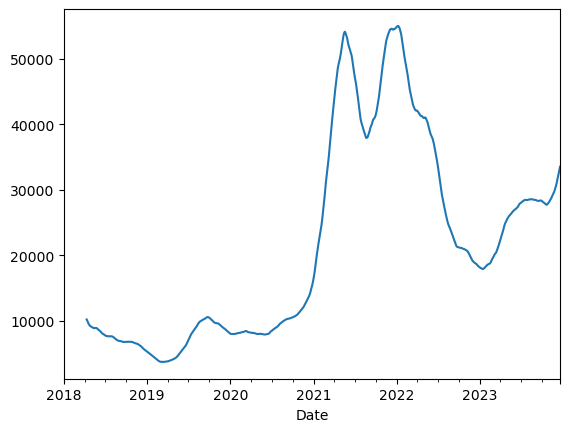

In [13]:
sma_100.plot()

<Axes: xlabel='Date'>

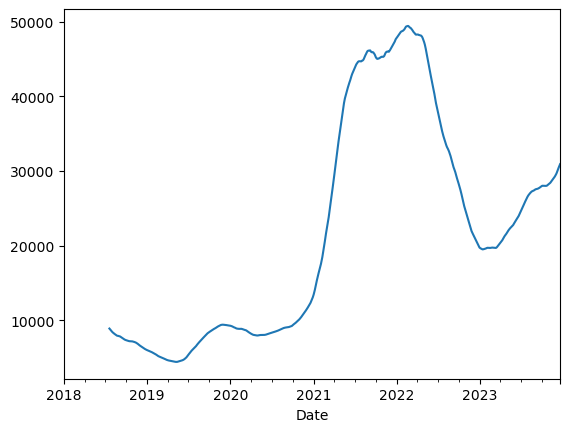

In [14]:
sma_200.plot()

<Axes: xlabel='Date'>

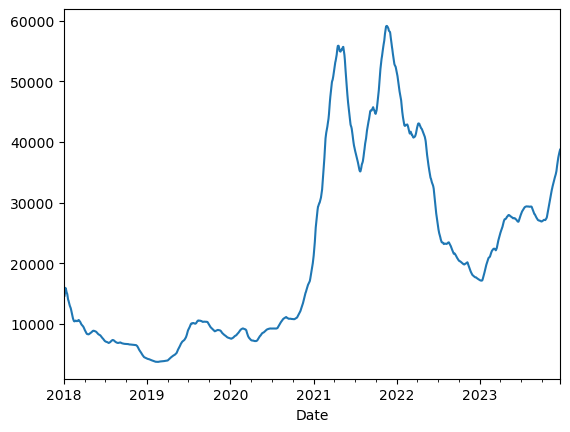

In [15]:
#EMA

ema_50 = df.ewm(span=50, adjust=True,min_periods=3).mean()
ema_50.plot()

In [16]:
data['sma_50'] = sma_50
data['ema_50'] = ema_50
data

,Open,High,Low,Close,Adj Close,Volume,sma_50,ema_50
Date,,,,,,,,
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000,NaN,NaN
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192,NaN,NaN
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160,NaN,14633.916224
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744,NaN,14889.905596
2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072,NaN,15439.253831
...,...,...,...,...,...,...,...,...
2023-12-15,43028.250000,43087.824219,41692.968750,41929.757812,41929.757812,19639442462,38060.941719,38139.022015
2023-12-16,41937.742188,42664.945312,41723.113281,42240.117188,42240.117188,14386729590,38227.548047,38299.849277
2023-12-17,42236.109375,42359.496094,41274.542969,41364.664062,41364.664062,16678702876,38373.049844,38420.038092


<Axes: xlabel='Date'>

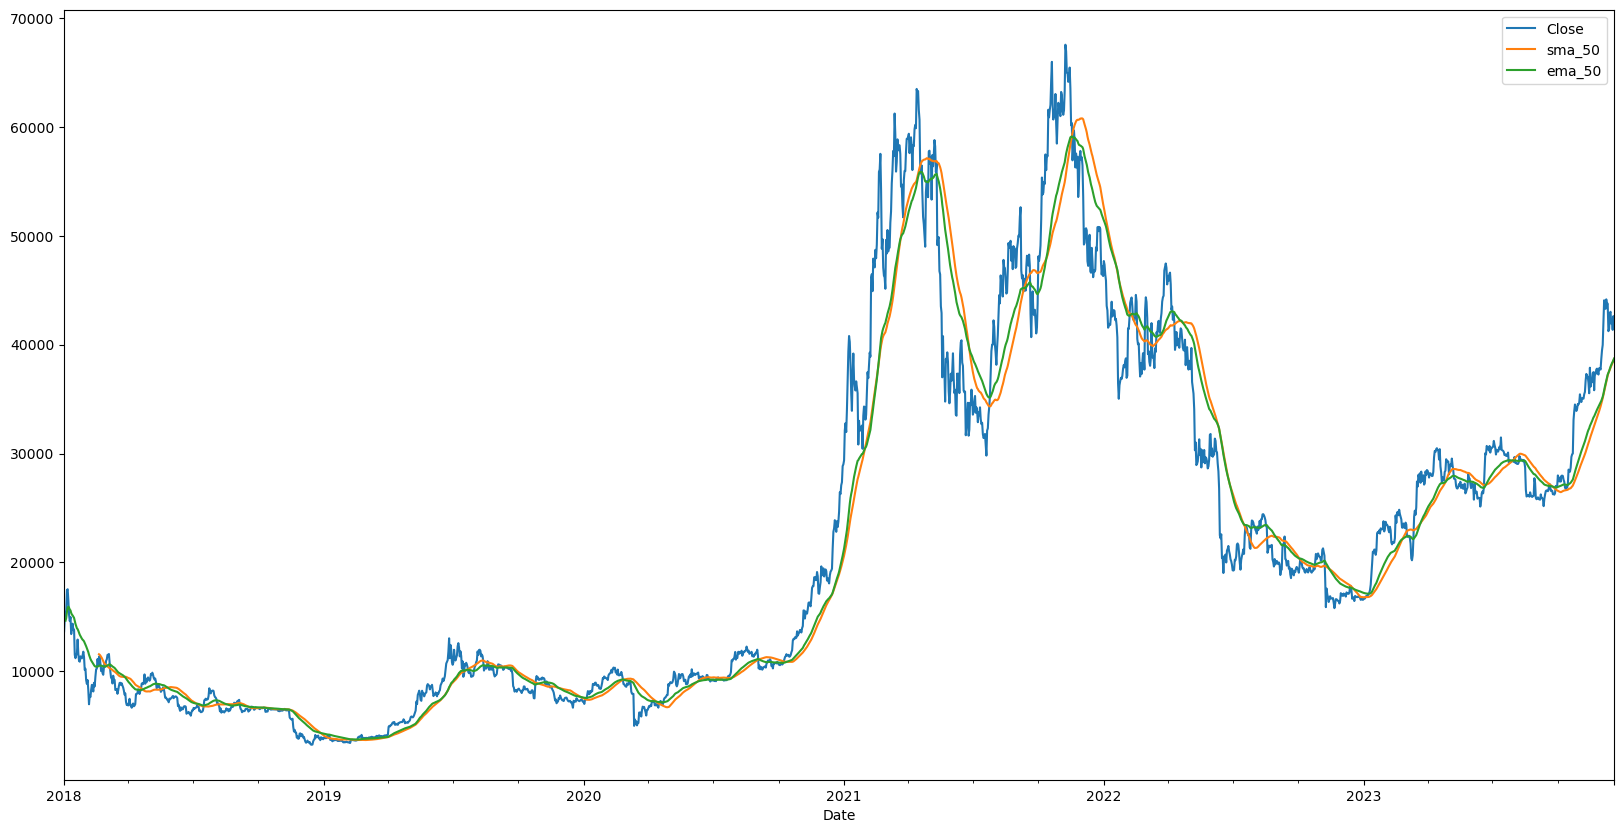

In [17]:
data.plot(y=['Close','sma_50','ema_50'],figsize=(20,10))